## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [12]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [13]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [38]:
# 細看遺失資料的樣態
missing_index=df_train.Age.isnull()
display(df_train[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,2,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,1,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,2,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,2,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,2,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,2,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,C
863,864,0,2,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,2,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S
878,879,0,2,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,S


## 觀察 Age

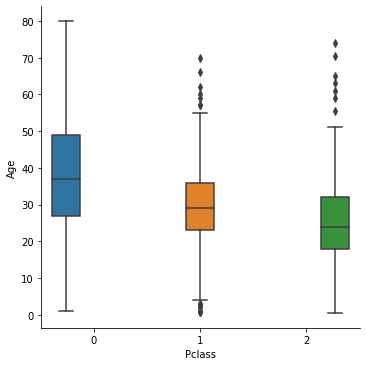

In [25]:

g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train,kind="box")

#年齡與艙等有差異

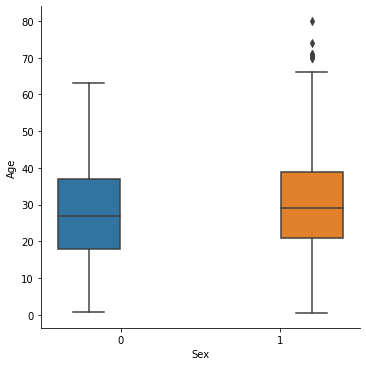

In [24]:

g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")
#姓別與年齡特性無差異

In [28]:
#step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])
df_train['Sex']=le.fit_transform(df_train['Sex'])
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [43]:

data=df_train.loc[:,['Age','Pclass', 'Sex']]
display(data)

,Age,Pclass,Sex
0,22.0,2,1
1,38.0,0,0
2,26.0,2,0
3,35.0,0,0
4,35.0,2,1
...,...,...,...
886,27.0,1,1
887,19.0,0,0
888,NaN,2,0
889,26.0,0,1


In [44]:

# KNN
value_neighbors=1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled = pd.DataFrame(imputer.fit_transform(data))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2
0,22.0,2.0,1.0
1,38.0,0.0,0.0
2,26.0,2.0,0.0
3,35.0,0.0,0.0
4,35.0,2.0,1.0
...,...,...,...
886,27.0,1.0,1.0
887,19.0,0.0,0.0
888,26.0,2.0,0.0
889,26.0,0.0,1.0
